### 2 gradient boosting algos,1 bagging,1 boosting, 1 decision tree,1 classical linear regression,lasso and ridge,1 k neighbors

In [1]:
import sys
import os
print(f"Python executable: {sys.executable}")
print(f"sys.path: {sys.path}")
print(f"VIRTUAL_ENV: {os.environ.get('VIRTUAL_ENV')}")

Python executable: d:\e2e_mlproject_1\venv2\Scripts\python.exe
sys.path: ['C:\\Users\\Ipsita\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'C:\\Users\\Ipsita\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'C:\\Users\\Ipsita\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'C:\\Users\\Ipsita\\AppData\\Local\\Programs\\Python\\Python313', 'd:\\e2e_mlproject_1\\venv2', '', 'd:\\e2e_mlproject_1\\venv2\\Lib\\site-packages', 'd:\\e2e_mlproject_1\\venv2\\Lib\\site-packages\\win32', 'd:\\e2e_mlproject_1\\venv2\\Lib\\site-packages\\win32\\lib', 'd:\\e2e_mlproject_1\\venv2\\Lib\\site-packages\\Pythonwin']
VIRTUAL_ENV: D:\e2e_mlproject_1\venv2


In [2]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv(r"D:\e2e_mlproject_1\notebook\data\stdnt_perf.csv")

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
y=df["math_score"]
X=df.drop(columns=["math_score"])

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


## Transform the columns:
### One Hot Encode the categorical and standardize the numerical

In [8]:
#separate the categorical and numerical column labels
cat_features=X.select_dtypes(include="object").columns.tolist()
num_features=X.select_dtypes(exclude="object").columns.tolist()

cat_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [9]:
col_tr=ColumnTransformer(
    [("onehotencoding",OneHotEncoder(dtype=int),cat_features),
     ("scaling",StandardScaler(),num_features)]
)

In [10]:
X=col_tr.fit_transform(X)
X.shape

(1000, 19)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
models={
    "linear regression":LinearRegression(),
    "lasso":Lasso(),
    "ridge":Ridge(),
    "decision tree regression":DecisionTreeRegressor(),
    "random forest regression":RandomForestRegressor(),
    "ada boost":AdaBoostRegressor(),
    "xgb boost":XGBRegressor()
}

In [13]:
models_list=list(models.keys())
mse_list_train=[]
mse_list_test=[]
mae_list_train=[]
mae_list_test=[]
#r2 is better if close to 1
r2_scores_train=[]
r2_scores_test=[]
models_list

['linear regression',
 'lasso',
 'ridge',
 'decision tree regression',
 'random forest regression',
 'ada boost',
 'xgb boost']

In [14]:
import threading


In [15]:
#using pseudo-multithreading in python
def model_training(model):
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    mse_list_train.append(mean_squared_error(y_train,y_train_pred))
    mae_list_train.append(mean_absolute_error(y_train,y_train_pred))
    r2_scores_train.append(r2_score(y_train,y_train_pred))
    y_test_pred=model.predict(X_test)
    mse_list_test.append(mean_squared_error(y_test,y_test_pred))
    mae_list_test.append(mean_absolute_error(y_test,y_test_pred))
    r2_scores_test.append(r2_score(y_test,y_test_pred))


In [16]:
for i in range(len(models_list)):
    threading.Thread(target=model_training,daemon=True,args=(models[models_list[i]],)).start()

In [17]:
print(r2_scores_train)

[0.8743172040139593, 0.8743042615212909, 0.8071462015863456, 0.9996534669718089, 0.9954995512962341, 0.8504304052384676, 0.9772718627987697]


In [18]:
print(r2_scores_test)

[0.8804332983749565, 0.8805931485028737, 0.8253197323627853, 0.7551968780924013, 0.8277965784072876, 0.84501692745707, 0.8510489879987067]


## Without Using Multithreading

In [19]:
_mse_list_train=[]
_mse_list_test=[]
_mae_list_train=[]
_mae_list_test=[]
#r2 is better if close to 1
_r2_scores_train=[]
_r2_scores_test=[]
models_list

['linear regression',
 'lasso',
 'ridge',
 'decision tree regression',
 'random forest regression',
 'ada boost',
 'xgb boost']

In [20]:
def _model_training(model):
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    _mse_list_train.append(mean_squared_error(y_train,y_train_pred))
    _mae_list_train.append(mean_absolute_error(y_train,y_train_pred))
    _r2_scores_train.append(r2_score(y_train,y_train_pred))
    y_test_pred=model.predict(X_test)
    _mse_list_test.append(mean_squared_error(y_test,y_test_pred))
    _mae_list_test.append(mean_absolute_error(y_test,y_test_pred))
    _r2_scores_test.append(r2_score(y_test,y_test_pred))

In [21]:
for i in range(len(models_list)):
    _model_training(models[models_list[i]])

In [22]:
print(_r2_scores_test)

[0.8804332983749565, 0.8253197323627853, 0.8805931485028737, 0.7269645892304708, 0.8527932252301048, 0.8505153264527319, 0.8277965784072876]


In [23]:
print(r2_scores_test)

[0.8804332983749565, 0.8805931485028737, 0.8253197323627853, 0.7551968780924013, 0.8277965784072876, 0.84501692745707, 0.8510489879987067]


In [24]:
print(r2_scores_train)

[0.8743172040139593, 0.8743042615212909, 0.8071462015863456, 0.9996534669718089, 0.9954995512962341, 0.8504304052384676, 0.9772718627987697]


In [25]:
print(_r2_scores_train)

[0.8743172040139593, 0.8071462015863456, 0.8743042615212909, 0.9996534669718089, 0.9761253387792554, 0.8496105964177921, 0.9954995512962341]


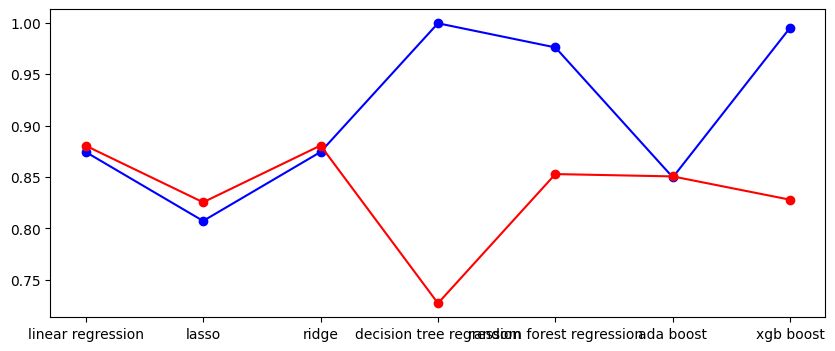

In [27]:
plt.figure(figsize=(10,4))
plt.plot([model for model in models_list],_r2_scores_train,marker="o",color="blue")
plt.plot([model for model in models_list],_r2_scores_test,marker="o",color="red")

### the ridge and linear reg model have low overfitting and bias, and out of the two ridge has a better r2 score for the test set.

## Ridge model is chosen for prediction